# Creating Cohort Analysis for Markerting & Adversting Company

<a href= "s1"> 1) Data Exloration</a>

<a href= "s2"> 2) Data wrangling, Cleaning data</a>
    
<a href= "s3"> 3) Top 3 most frequently represented countries on the dataframe</a>
    
<a href= "s4"> 4) Creating dataframe, creating cohort and cohort analysis for American customers</a>
    
<a href= "s5"> 5)Creating dataframe, creating cohort and cohort analysis for Australian customers</a>

<a href= "s6"> 6) Creating dataframe, creating cohort and cohort analysis for Canadian customers</a>

<a href= "s7"> 7) Creating csv for cleaned master data (no geographic separation) to prepare a cohort layer cake</a>
    
<a href= "s8"> 8) Conclusion</a>

# 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Data Exploration
df = pd.read_csv("query_result_2021-05-18T03 46 57.095586Z (1).csv")

In [3]:
#display first 5 rows
df.head()

,created,paid,refunded,customer,card__country
0,2020-10-21T04:45:40Z,250,250,cus_IF3JcGrw0aMpgv,US
1,2020-10-27T23:02:31Z,250,250,cus_IHaMqtFwUNAO09,US
2,2020-11-01T02:42:43Z,250,250,cus_IJ8oU3Lo2gaHls,DE
3,2020-11-17T19:51:25Z,750,0,cus_HbD8AagiDUOBoG,US
4,2020-11-17T21:28:58Z,250,0,cus_IDnbmEhzNjlGV0,GB


The function below aggrates the statstical and descriptive data about the data set we're using

In [4]:
def explore(x):
    divider = "*_*"
    #creates a divider between each method output breaking at each end.
    print("\n {} \n".format((divider*20))) 
    
    #title for output.
    print("Dataframe Makeup \n") 
    
    # Explains what the data and values the data is madeup from.
    x.info() 
    
    #creates a dvider between each method output breaking at each end.
    print("\n {} \n".format((divider*20))) 
    
    #Gives a statstical breakdown of the data.
    print("Descriptive Statistics \n\n", x.describe()) 
    
    #creates a dvider between each method output breaking at each end.
    print("\n {} \n".format((divider*20))) 
    
    # Gives the shape of the data.
    print("Shape of dataframe: {}".format(x.shape)) 
    
    #creates a dvider between each method output breaking at each end.
    print("\n {} \n".format((divider*20))) 
    return

In [5]:
explore(df)


 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created        5725 non-null   object
 1   paid           5725 non-null   int64 
 2   refunded       5725 non-null   int64 
 3   customer       5725 non-null   object
 4   card__country  1678 non-null   object
dtypes: int64(2), object(3)
memory usage: 223.8+ KB

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Descriptive Statistics 

               paid     refunded
count  5725.000000  5725.000000
mean    249.217817    24.466725
std     254.749626   149.333477
min       1.000000     0.000000
25%     250.000000     0.000000
50%     250.000000     0.000000
75%     250.000000     0.000000
max    8475.000000  8475.000000

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Shape of data

# 2. Cleaning Data

we want to clean up the data so that there are no missing values.

In [6]:
#Create a function that sums all of the missing data from each row so that we can count what we have

def missing_data(y):
    return y.isna().sum()

In [7]:
missing_data(df)

created             0
paid                0
refunded            0
customer            0
card__country    4047
dtype: int64

In [8]:
#drops missing data from the card_country column
cleaned_data = df.dropna()

In [9]:
explore(cleaned_data)


 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 5724
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created        1678 non-null   object
 1   paid           1678 non-null   int64 
 2   refunded       1678 non-null   int64 
 3   customer       1678 non-null   object
 4   card__country  1678 non-null   object
dtypes: int64(2), object(3)
memory usage: 78.7+ KB

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Descriptive Statistics 

               paid     refunded
count  1678.000000  1678.000000
mean    283.908224    37.460667
std     323.106098   247.111896
min       1.000000     0.000000
25%     250.000000     0.000000
50%     250.000000     0.000000
75%     250.000000     0.000000
max    8475.000000  8475.000000

 *_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_* 

Shape of dataf

## Find Duplicate Rows based on all columns

In [10]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = cleaned_data[cleaned_data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [created, paid, refunded, customer, card__country]
Index: []


There are no duplicate values in dataframe.

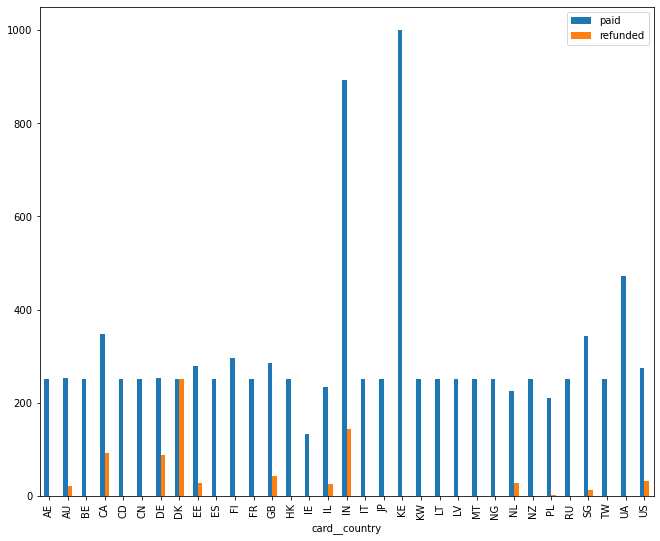

In [11]:
table = pd.pivot_table(data = cleaned_data, index = ['card__country'])
table.plot(kind ='bar',figsize = (11,9))

The highest paid countries are KE(Kenya), IN (India).
The highest refunded countries are DK (Denmark), IN (India)

# 3. Finding top 3 most frequently represented countries on the dataframe.

In [12]:
cleaned_data.card__country.value_counts()

US    997
AU    203
CA    190
GB     99
FI     32
SG     30
DE     17
FR     14
IL     12
NL      9
EE      9
UA      9
IE      9
IN      7
PL      6
MT      5
HK      4
RU      3
IT      3
ES      3
DK      2
NZ      2
LT      2
JP      2
LV      1
NG      1
KW      1
KE      1
CN      1
TW      1
CD      1
AE      1
BE      1
Name: card__country, dtype: int64

Top 3 most frequently represented countries on the dataframe are US, AU, CA

## Assumption

Making assumption- All the datetime and currency in a proper one format and there is no need of any conversion

# 4. Creating dataframe for American customers

In [13]:
US_data = cleaned_data[cleaned_data['card__country']=='US']
US_data

,created,paid,refunded,customer,card__country
0,2020-10-21T04:45:40Z,250,250,cus_IF3JcGrw0aMpgv,US
1,2020-10-27T23:02:31Z,250,250,cus_IHaMqtFwUNAO09,US
3,2020-11-17T19:51:25Z,750,0,cus_HbD8AagiDUOBoG,US
6,2020-11-17T22:18:09Z,250,0,cus_FH0Csodtt6j0ff,US
7,2020-11-17T23:05:19Z,1000,0,cus_IBtiU1rmRe2oKe,US
...,...,...,...,...,...
5715,2020-08-15T17:03:43Z,250,250,cus_HTHKDcrJQlMzMN,US
5716,2020-11-15T17:03:25Z,250,250,cus_HTHKDcrJQlMzMN,US
5717,2020-09-15T17:03:46Z,250,250,cus_HTHKDcrJQlMzMN,US
5718,2020-12-15T17:03:16Z,250,250,cus_HTHKDcrJQlMzMN,US


In [14]:
#converting into proper format
US_data['created'] = pd.to_datetime(US_data['created'])
US_data

<ipython-input-14-99bc6e1ba7ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['created'] = pd.to_datetime(US_data['created'])


,created,paid,refunded,customer,card__country
0,2020-10-21 04:45:40+00:00,250,250,cus_IF3JcGrw0aMpgv,US
1,2020-10-27 23:02:31+00:00,250,250,cus_IHaMqtFwUNAO09,US
3,2020-11-17 19:51:25+00:00,750,0,cus_HbD8AagiDUOBoG,US
6,2020-11-17 22:18:09+00:00,250,0,cus_FH0Csodtt6j0ff,US
7,2020-11-17 23:05:19+00:00,1000,0,cus_IBtiU1rmRe2oKe,US
...,...,...,...,...,...
5715,2020-08-15 17:03:43+00:00,250,250,cus_HTHKDcrJQlMzMN,US
5716,2020-11-15 17:03:25+00:00,250,250,cus_HTHKDcrJQlMzMN,US
5717,2020-09-15 17:03:46+00:00,250,250,cus_HTHKDcrJQlMzMN,US
5718,2020-12-15 17:03:16+00:00,250,250,cus_HTHKDcrJQlMzMN,US


In [15]:
US_data.corr()

,paid,refunded
paid,1.000000,0.332021
refunded,0.332021,1.000000


# Munging and Wrangling data for US

In [16]:
def monthly(x):
    return datetime.datetime(x.year, x.month, 1)

In [17]:
#Create a new column 
US_data['InvoiceMonth'] = US_data['created'].apply(monthly)

<ipython-input-17-35478d173ddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['InvoiceMonth'] = US_data['created'].apply(monthly)


In [18]:
#Always inspect the data you've just created
US_data['InvoiceMonth']

0      2020-10-01
1      2020-10-01
3      2020-11-01
6      2020-11-01
7      2020-11-01
          ...    
5715   2020-08-01
5716   2020-11-01
5717   2020-09-01
5718   2020-12-01
5719   2020-12-01
Name: InvoiceMonth, Length: 997, dtype: datetime64[ns]

In [19]:
#Create a CohortMonth column by grouping data and selecting the earliest instance in the data. 
US_data['CohortMonth'] = US_data.groupby('customer')['InvoiceMonth'].transform('min')

<ipython-input-19-fcf7626816be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['CohortMonth'] = US_data.groupby('customer')['InvoiceMonth'].transform('min')


In [20]:
US_data['CohortMonth']

0      2020-10-01
1      2020-10-01
3      2020-11-01
6      2020-11-01
7      2020-11-01
          ...    
5715   2020-06-01
5716   2020-06-01
5717   2020-06-01
5718   2020-06-01
5719   2020-11-01
Name: CohortMonth, Length: 997, dtype: datetime64[ns]

In [21]:
US_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth
0,2020-10-21 04:45:40+00:00,250,250,cus_IF3JcGrw0aMpgv,US,2020-10-01,2020-10-01
1,2020-10-27 23:02:31+00:00,250,250,cus_IHaMqtFwUNAO09,US,2020-10-01,2020-10-01
3,2020-11-17 19:51:25+00:00,750,0,cus_HbD8AagiDUOBoG,US,2020-11-01,2020-11-01
6,2020-11-17 22:18:09+00:00,250,0,cus_FH0Csodtt6j0ff,US,2020-11-01,2020-11-01
7,2020-11-17 23:05:19+00:00,1000,0,cus_IBtiU1rmRe2oKe,US,2020-11-01,2020-11-01


# Create the Cohort for US Customers

In [22]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [23]:
invoiceYear, invoiceMonth = get_int(US_data, 'InvoiceMonth')
cohortYear, cohortMonth = get_int(US_data, 'CohortMonth')

In [24]:
diffYear = invoiceYear - cohortYear
diffMonth = invoiceMonth - cohortMonth

In [25]:
US_data['Month_Index'] = diffYear * 12 + diffMonth + 1

<ipython-input-25-9c682d16c9f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['Month_Index'] = diffYear * 12 + diffMonth + 1


In [26]:
US_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth,Month_Index
0,2020-10-21 04:45:40+00:00,250,250,cus_IF3JcGrw0aMpgv,US,2020-10-01,2020-10-01,1
1,2020-10-27 23:02:31+00:00,250,250,cus_IHaMqtFwUNAO09,US,2020-10-01,2020-10-01,1
3,2020-11-17 19:51:25+00:00,750,0,cus_HbD8AagiDUOBoG,US,2020-11-01,2020-11-01,1
6,2020-11-17 22:18:09+00:00,250,0,cus_FH0Csodtt6j0ff,US,2020-11-01,2020-11-01,1
7,2020-11-17 23:05:19+00:00,1000,0,cus_IBtiU1rmRe2oKe,US,2020-11-01,2020-11-01,1


# Cohort Analysis for US Customers

Finally we create a Cohort Analysis. We're using, what I deem to be, the top most used function for marketering doing data analysis `pd.groupby()`. This allows you to group data by a specific column. Then we'll be using `pd. pivot_table()` to convert the data into a what you would typically recognise as a Cohort Table.

In [27]:
#Group the data by columns CohortMonth','Month_Index' then aggreate by column 'customer'
cohort_USdata = US_data.groupby(
    ['CohortMonth', 'Month_Index'])['customer'].apply(pd.Series.nunique).reset_index()

In [28]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_UScount = cohort_USdata.pivot_table(index = 'CohortMonth',
                                       columns = 'Month_Index',
                                       values = 'customer')

In [29]:
cohort_UScount

Month_Index,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2020-06-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2020-07-01,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2020-08-01,4.0,4.0,4.0,2.0,1.0,NaN,NaN
2020-09-01,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2020-10-01,45.0,29.0,24.0,NaN,NaN,NaN,NaN
2020-11-01,292.0,230.0,NaN,NaN,NaN,NaN,NaN
2020-12-01,65.0,NaN,NaN,NaN,NaN,NaN,NaN


# Create retention as a percentage

In [30]:
cohort_USsize = cohort_UScount.iloc[:,0] #select all the rows : select the first column
retention_US = cohort_UScount.divide(cohort_USsize, axis=0) #Divide the cohort by the first column
retention_US.round(3) # round the retention to 3 places

Month_Index,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2020-06-01,1.0,1.000,1.000,1.0,1.00,1.0,1.0
2020-07-01,1.0,1.000,1.000,1.0,1.00,1.0,NaN
2020-08-01,1.0,1.000,1.000,0.5,0.25,NaN,NaN
2020-09-01,1.0,1.000,1.000,NaN,NaN,NaN,NaN
2020-10-01,1.0,0.644,0.533,NaN,NaN,NaN,NaN
2020-11-01,1.0,0.788,NaN,NaN,NaN,NaN,NaN
2020-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# Creating cohort heatmaps for US customers

<Figure size 792x648 with 0 Axes>

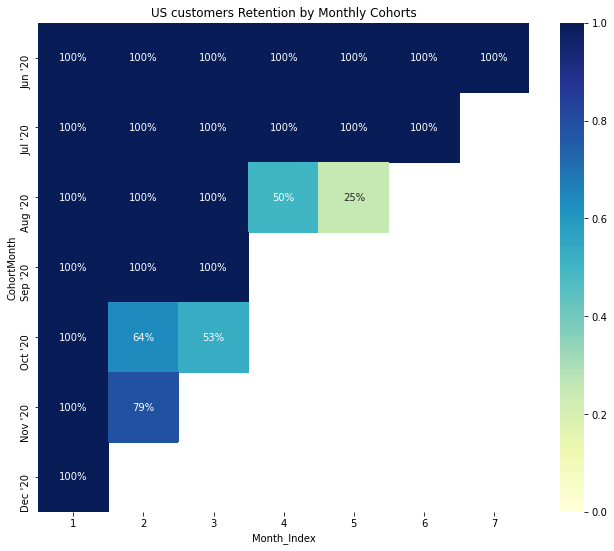

In [31]:
month_list = [ "Jun '20", "Jul '20", "Aug '20", "Sep '20", "Oct '20", "Nov '20", "Dec '20"]
plt.figure(figsize = (11,9))
plt.figure(figsize = (11,9))
plt.title('US customers Retention by Monthly Cohorts')
sns.heatmap(data = retention_US, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 1.0,
            cmap = "YlGnBu", yticklabels=month_list)
plt.show()

Business metric - Rentention rate: The percentage of active customers compared to the total number of customers after a specific time interval is called rentetion rate.


The rentention rate dataframe represent US Customers retained across cohorts.
* Month_Index represent the cohort
* Columns represent the number of months since current cohort.


The Aug cohort month and 4th month_index column in figure with values 50% represents, 50% of cohorts (retention)- American customers which signed in Aug 2020 were active 4 months later. 

Also, 100% value in all cells in column 1 says that this was the month when customer signed up or did their first transaction and have rate of 100% activity.

# Average paid 

In [32]:
cohort_USdata2 = US_data.groupby(['CohortMonth', 'Month_Index'])['paid'].mean().reset_index()
average_paid  = cohort_USdata2.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'paid').round(1)
average_paid

Month_Index,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2020-06-01,250.0,250.0,250.0,250.0,250.0,250.0,250.0
2020-07-01,250.0,250.0,250.0,250.0,250.0,250.0,NaN
2020-08-01,250.0,250.0,250.0,250.0,250.0,NaN,NaN
2020-09-01,250.0,250.0,250.0,NaN,NaN,NaN,NaN
2020-10-01,292.6,293.5,260.4,NaN,NaN,NaN,NaN
2020-11-01,275.5,245.0,NaN,NaN,NaN,NaN,NaN
2020-12-01,421.2,NaN,NaN,NaN,NaN,NaN,NaN


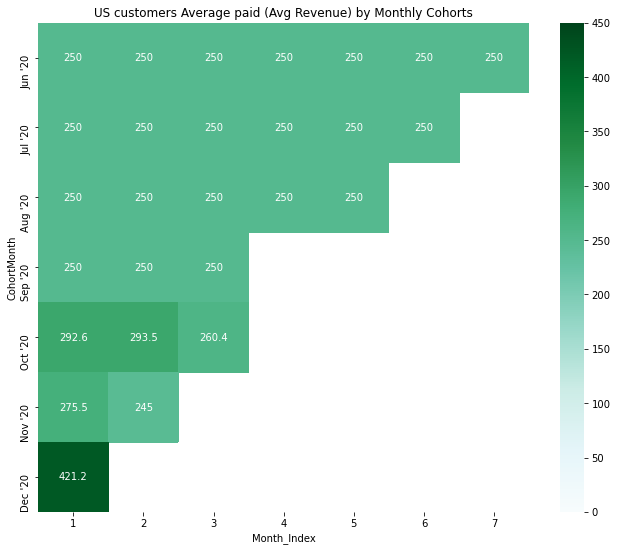

In [33]:
month_list = [ "Jun '20", "Jul '20", "Aug '20", "Sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('US customers Average paid (Avg Revenue) by Monthly Cohorts')
sns.heatmap(data = average_paid, 
            annot = True,
            vmin = 450,
            vmax = 0,
            cmap = "BuGn",
             fmt='g', yticklabels=month_list)
plt.show()

The June cohort month and 4th month_index column in figure with values 250 represents, average revenue made from American customers which signed in jun 2020 and  4 month-index later is 250.

Average revenue made from American customers is highest in Dec 2020 and 1 st cohort month_index - 421.2

# Average refund

In [34]:
cohort_USdata3 = US_data.groupby(['CohortMonth', 'Month_Index'])['refunded'].mean().reset_index()
average_refund  = cohort_USdata3.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'refunded').round(1)
average_refund

Month_Index,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2020-06-01,250.0,250.0,250.0,250.0,250.0,250.0,250.0
2020-07-01,250.0,250.0,250.0,250.0,250.0,250.0,NaN
2020-08-01,250.0,250.0,250.0,250.0,250.0,NaN,NaN
2020-09-01,250.0,250.0,250.0,NaN,NaN,NaN,NaN
2020-10-01,107.6,45.8,31.2,NaN,NaN,NaN,NaN
2020-11-01,12.9,5.8,NaN,NaN,NaN,NaN,NaN
2020-12-01,133.0,NaN,NaN,NaN,NaN,NaN,NaN


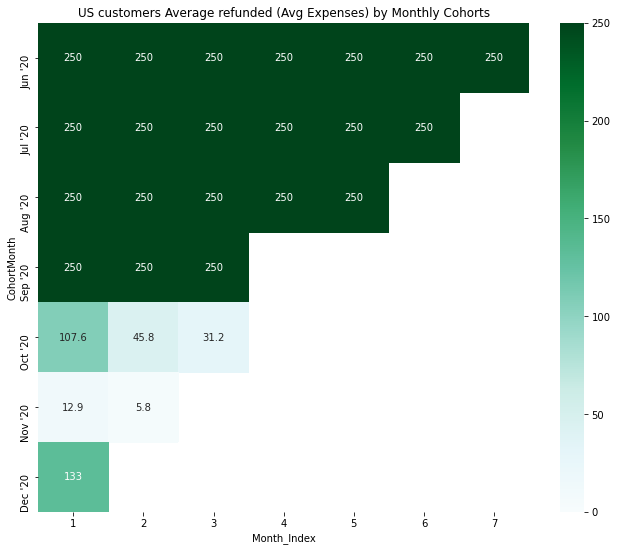

In [35]:
month_list = [ "Jun '20", "Jul '20", "Aug '20", "Sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('US customers Average refunded (Avg Expenses) by Monthly Cohorts')
sns.heatmap(data = average_refund, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From the above heat maps from paid (revenue) and refunded(expenses). It is clear that business is not making much profit from American customers Jun 2020 to Sep 2020. We can see more details on heatmaps for profit.

# Average Profit made from US Customers

In [36]:
#Create a new column for Total Sales 
US_data['Totalprofit_US'] = US_data['paid'] - US_data['refunded']

<ipython-input-36-d22ccc76e81e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['Totalprofit_US'] = US_data['paid'] - US_data['refunded']


In [37]:
US_data['Totalprofit_US'].head()

0       0
1       0
3     750
6     250
7    1000
Name: Totalprofit_US, dtype: int64

In [38]:
cohort_USdata3 = US_data.groupby(['CohortMonth', 'Month_Index'])['Totalprofit_US'].mean().reset_index()
average_USprofit  = cohort_USdata3.pivot_table(index = 'CohortMonth',
                                           columns = 'Month_Index',
                                      values = 'Totalprofit_US').round(1)
average_USprofit

Month_Index,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2020-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-08-01,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2020-09-01,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-10-01,185.0,247.7,229.2,NaN,NaN,NaN,NaN
2020-11-01,262.6,239.2,NaN,NaN,NaN,NaN,NaN
2020-12-01,288.2,NaN,NaN,NaN,NaN,NaN,NaN


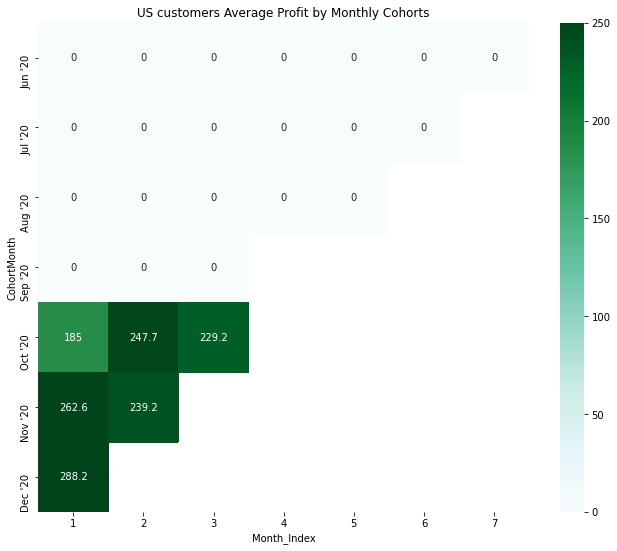

In [39]:
month_list = ["Jun '20", "Jul '20", "Aug '20", "Sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('US customers Average Profit by Monthly Cohorts')
sns.heatmap(data = average_USprofit, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From heatmaps it is clear that business is not making profit from American customers from june 2020 to sep 2020. From Oct 2020 to Dec 2020 company is making profit.
For Dec 2020 and 1st cohort Month_index company makes highest average profit for American customers of 288.2

# 5. Creating dataframe for Australian customers

In [40]:
AU_data = cleaned_data[cleaned_data['card__country']=='AU']
AU_data

,created,paid,refunded,customer,card__country
9,2020-11-17T23:12:04Z,250,0,cus_IPSFRhCvHRLSEz,AU
10,2020-12-04T06:29:28Z,31,0,cus_Hu0bpPwajQ2UyQ,AU
20,2020-11-18T07:23:37Z,250,0,cus_IPaBLJmIuD2eN8,AU
21,2020-11-18T07:49:22Z,250,0,cus_I2iqx77roDhsvr,AU
33,2020-11-27T00:18:13Z,250,0,cus_HikZLaoalk2E2U,AU
...,...,...,...,...,...
5720,2020-10-11T08:11:05Z,250,250,cus_HoUaOBLxK6Klaa,AU
5721,2020-08-11T07:08:54Z,250,250,cus_HoUaOBLxK6Klaa,AU
5722,2020-11-11T08:09:52Z,250,250,cus_HoUaOBLxK6Klaa,AU
5723,2020-09-11T08:09:30Z,250,250,cus_HoUaOBLxK6Klaa,AU


In [41]:
#converting into proper format
AU_data['created'] = pd.to_datetime(AU_data['created'])
AU_data

<ipython-input-41-05ca1f6bda48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_data['created'] = pd.to_datetime(AU_data['created'])


,created,paid,refunded,customer,card__country
9,2020-11-17 23:12:04+00:00,250,0,cus_IPSFRhCvHRLSEz,AU
10,2020-12-04 06:29:28+00:00,31,0,cus_Hu0bpPwajQ2UyQ,AU
20,2020-11-18 07:23:37+00:00,250,0,cus_IPaBLJmIuD2eN8,AU
21,2020-11-18 07:49:22+00:00,250,0,cus_I2iqx77roDhsvr,AU
33,2020-11-27 00:18:13+00:00,250,0,cus_HikZLaoalk2E2U,AU
...,...,...,...,...,...
5720,2020-10-11 08:11:05+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5721,2020-08-11 07:08:54+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5722,2020-11-11 08:09:52+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5723,2020-09-11 08:09:30+00:00,250,250,cus_HoUaOBLxK6Klaa,AU


In [42]:
AU_data.corr()

,paid,refunded
paid,1.000000,0.544292
refunded,0.544292,1.000000


# Munging and Wrangling data for AU

In [43]:
def monthly(x):
    return datetime.datetime(x.year, x.month, 1)

In [44]:
#Create a new column 
AU_data['InvoiceMonth'] = AU_data['created'].apply(monthly)

<ipython-input-44-b4eeb3b351d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_data['InvoiceMonth'] = AU_data['created'].apply(monthly)


In [45]:
#Always inspect the data you've just created
AU_data['InvoiceMonth']

9      2020-11-01
10     2020-12-01
20     2020-11-01
21     2020-11-01
33     2020-11-01
          ...    
5720   2020-10-01
5721   2020-08-01
5722   2020-11-01
5723   2020-09-01
5724   2020-12-01
Name: InvoiceMonth, Length: 203, dtype: datetime64[ns]

In [46]:
#Create a CohortMonth column by grouping data and selecting the earliest instance in the data. 
AU_data['CohortMonth'] = AU_data.groupby('customer')['InvoiceMonth'].transform('min')

<ipython-input-46-5b749533d091>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_data['CohortMonth'] = AU_data.groupby('customer')['InvoiceMonth'].transform('min')


In [47]:
AU_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth
9,2020-11-17 23:12:04+00:00,250,0,cus_IPSFRhCvHRLSEz,AU,2020-11-01,2020-11-01
10,2020-12-04 06:29:28+00:00,31,0,cus_Hu0bpPwajQ2UyQ,AU,2020-12-01,2020-12-01
20,2020-11-18 07:23:37+00:00,250,0,cus_IPaBLJmIuD2eN8,AU,2020-11-01,2020-11-01
21,2020-11-18 07:49:22+00:00,250,0,cus_I2iqx77roDhsvr,AU,2020-11-01,2020-11-01
33,2020-11-27 00:18:13+00:00,250,0,cus_HikZLaoalk2E2U,AU,2020-11-01,2020-11-01


# Create the Cohort for AU Customers

In [48]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [49]:
invoiceYear, invoiceMonth = get_int(AU_data, 'InvoiceMonth')
cohortYear, cohortMonth = get_int(AU_data, 'CohortMonth')

In [50]:
diffYear = invoiceYear - cohortYear
diffMonth = invoiceMonth - cohortMonth

In [51]:
AU_data['Month_Index'] = diffYear * 12 + diffMonth + 1

<ipython-input-51-783c653a0574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_data['Month_Index'] = diffYear * 12 + diffMonth + 1


In [52]:
AU_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth,Month_Index
9,2020-11-17 23:12:04+00:00,250,0,cus_IPSFRhCvHRLSEz,AU,2020-11-01,2020-11-01,1
10,2020-12-04 06:29:28+00:00,31,0,cus_Hu0bpPwajQ2UyQ,AU,2020-12-01,2020-12-01,1
20,2020-11-18 07:23:37+00:00,250,0,cus_IPaBLJmIuD2eN8,AU,2020-11-01,2020-11-01,1
21,2020-11-18 07:49:22+00:00,250,0,cus_I2iqx77roDhsvr,AU,2020-11-01,2020-11-01,1
33,2020-11-27 00:18:13+00:00,250,0,cus_HikZLaoalk2E2U,AU,2020-11-01,2020-11-01,1


# Cohort Analysis for AU Customers

In [53]:
#Group the data by columns CohortMonth','Month_Index' then aggreate by column 'customer'
cohort_AUdata = AU_data.groupby(
    ['CohortMonth', 'Month_Index'])['customer'].apply(pd.Series.nunique).reset_index()

In [54]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_AUcount = cohort_AUdata.pivot_table(index = 'CohortMonth',
                                       columns = 'Month_Index',
                                       values = 'customer')

In [55]:
cohort_AUcount

Month_Index,1,2,3,4,5
CohortMonth,,,,,
2020-08-01,1.0,1.0,1.0,1.0,1.0
2020-10-01,4.0,3.0,3.0,NaN,NaN
2020-11-01,54.0,37.0,NaN,NaN,NaN
2020-12-01,12.0,NaN,NaN,NaN,NaN


# Create retention as a percentage

In [56]:
cohort_AUsize = cohort_AUcount.iloc[:,0] #select all the rows : select the first column
retention_AU = cohort_AUcount.divide(cohort_AUsize, axis=0) #Divide the cohort by the first column
retention_AU.round(3) # round the retention to 3 places

Month_Index,1,2,3,4,5
CohortMonth,,,,,
2020-08-01,1.0,1.000,1.00,1.0,1.0
2020-10-01,1.0,0.750,0.75,NaN,NaN
2020-11-01,1.0,0.685,NaN,NaN,NaN
2020-12-01,1.0,NaN,NaN,NaN,NaN


# Creating cohort heatmaps for AU customers

<Figure size 792x648 with 0 Axes>

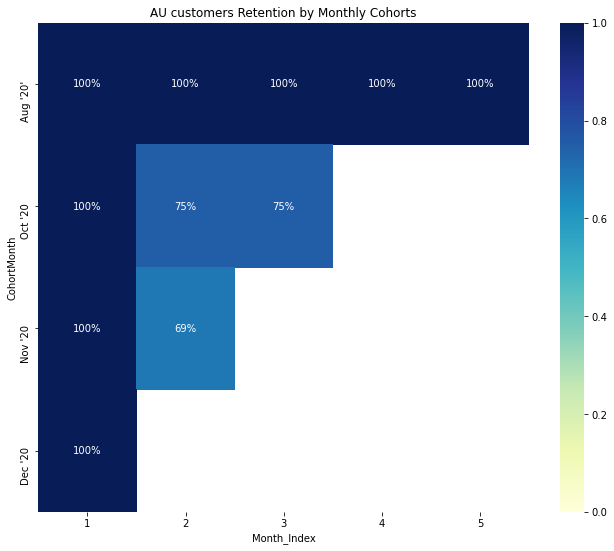

In [57]:
month_list = ["Aug '20'", "Oct '20", "Nov '20", "Dec '20"]
plt.figure(figsize = (11,9))
plt.figure(figsize = (11,9))
plt.title('AU customers Retention by Monthly Cohorts')
sns.heatmap(data = retention_AU, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 1.0,
            cmap = "YlGnBu", yticklabels=month_list)
plt.show()

The Aug cohort month and 4th month_index column in figure with values 100% represents, 100% of cohorts- Australian customers which signed in Aug 2020 were active 4 months later. 

Also, 100% value in all cells in column 1 says that this was the month when customer signed up or did their first transaction and have rate of 100% activity.

There is no value for sep cohort month. This is because of lot of missing values in data.

# Average paid

In [58]:
cohort_AUdata2 = AU_data.groupby(['CohortMonth', 'Month_Index'])['paid'].mean().reset_index()
average_AUpaid  = cohort_AUdata2.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'paid').round(1)
average_AUpaid

Month_Index,1,2,3,4,5
CohortMonth,,,,,
2020-08-01,250.0,250.0,250.0,250.0,250.0
2020-10-01,250.0,190.8,250.0,NaN,NaN
2020-11-01,289.1,269.9,NaN,NaN,NaN
2020-12-01,189.5,NaN,NaN,NaN,NaN


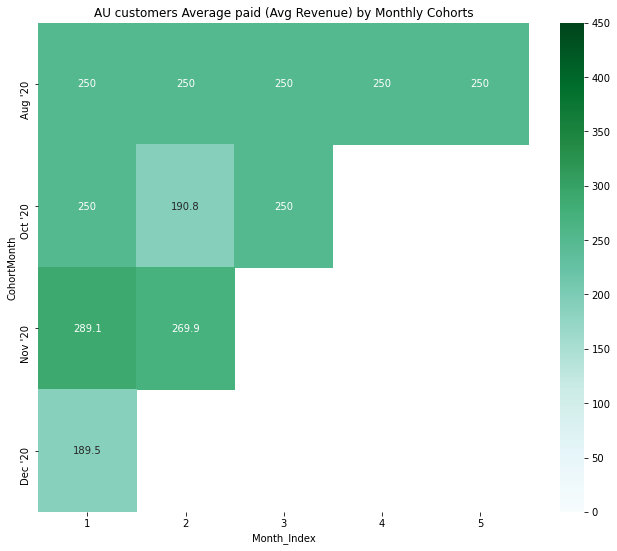

In [59]:
month_list = [  "Aug '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('AU customers Average paid (Avg Revenue) by Monthly Cohorts')
sns.heatmap(data = average_AUpaid, 
            annot = True,
            vmin = 450,
            vmax = 0,
            cmap = "BuGn",
             fmt='g', yticklabels=month_list)
plt.show()

The Aug cohort month and 4th month_index column in figure with values 250 represents, average revenue made from Australian customers which signed in Aug 2020 and  4 month-index later is 250.

Average revenue made from Australian customers is lowest in Dec 2020 and 1 st cohort month_index - 189.5

# Average refund

In [60]:
cohort_AUdata3 = AU_data.groupby(['CohortMonth', 'Month_Index'])['refunded'].mean().reset_index()
average_AUrefund  = cohort_AUdata3.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'refunded').round(1)
average_AUrefund

Month_Index,1,2,3,4,5
CohortMonth,,,,,
2020-08-01,250.0,250.0,250.0,250.0,250.0
2020-10-01,50.0,0.0,0.0,NaN,NaN
2020-11-01,4.0,0.0,NaN,NaN,NaN
2020-12-01,56.8,NaN,NaN,NaN,NaN


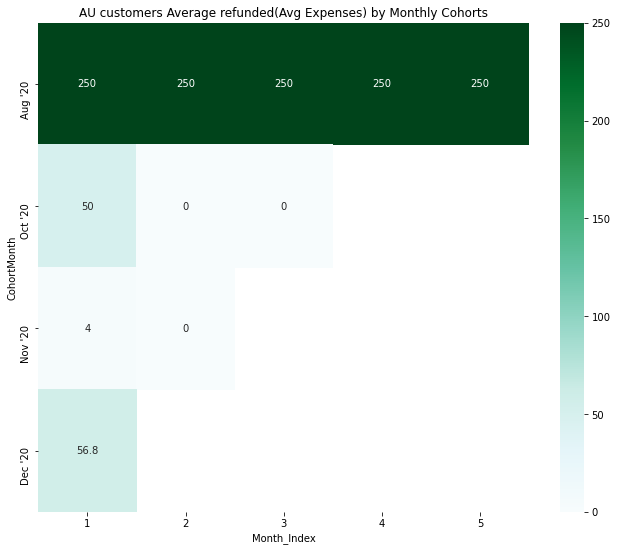

In [61]:
month_list = [ "Aug '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('AU customers Average refunded(Avg Expenses) by Monthly Cohorts')
sns.heatmap(data = average_AUrefund, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From the above heat maps from paid (revenue) and refunded(expenses). It is clear that business is not making much profit from Australian customers in  Aug 2020. We can see more details on heatmaps for profit.

# Average Profit made from AU Customers

In [62]:
#Create a new column for Total Sales 
AU_data['Totalprofit_AU'] = AU_data['paid'] - AU_data['refunded']

<ipython-input-62-c29d8ada6645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_data['Totalprofit_AU'] = AU_data['paid'] - AU_data['refunded']


In [63]:
AU_data['Totalprofit_AU'].head()

9     250
10     31
20    250
21    250
33    250
Name: Totalprofit_AU, dtype: int64

In [64]:
cohort_AUdata3 = AU_data.groupby(['CohortMonth', 'Month_Index'])['Totalprofit_AU'].mean().reset_index()
average_AUprofit  = cohort_AUdata3.pivot_table(index = 'CohortMonth',
                                           columns = 'Month_Index',
                                      values = 'Totalprofit_AU').round(1)
average_AUprofit

Month_Index,1,2,3,4,5
CohortMonth,,,,,
2020-08-01,0.0,0.0,0.0,0.0,0.0
2020-10-01,200.0,190.8,250.0,NaN,NaN
2020-11-01,285.1,269.9,NaN,NaN,NaN
2020-12-01,132.7,NaN,NaN,NaN,NaN


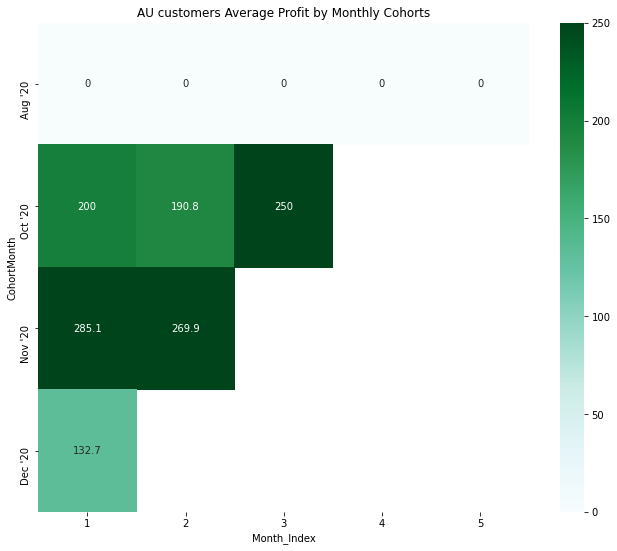

In [65]:
month_list = [ "Aug '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('AU customers Average Profit by Monthly Cohorts')
sns.heatmap(data = average_AUprofit, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From heatmaps it is clear that business is not making profit from Australian customers in Aug 2020. From Oct 2020 to Dec 2020 company is making profit. For Nov 2020 and 1st cohort Month_index company makes highest average profit for Australian customers of 285.1.

# 6. Creating dataframe for Canadian customers

In [66]:
CA_data = cleaned_data[cleaned_data['card__country']=='CA']
CA_data

,created,paid,refunded,customer,card__country
27,2020-11-18T15:30:24Z,262,0,cus_I2qFY6yixgMXlE,CA
31,2020-11-17T16:48:07Z,525,0,cus_HuAMgby0dmaLvt,CA
41,2020-11-04T06:41:06Z,262,262,cus_IKKK06YE3UDPkS,CA
43,2020-11-08T16:20:37Z,262,262,cus_ILBTbvrwQSN69i,CA
47,2020-11-16T05:17:49Z,262,262,cus_IOnhjOcyUitT2L,CA
...,...,...,...,...,...
5690,2020-10-03T16:17:23Z,282,282,cus_HlceZMWwTp3Iy3,CA
5696,2020-11-30T17:58:48Z,262,262,cus_HkWcil57GbawZQ,CA
5697,2020-12-31T17:59:34Z,262,262,cus_HkWcil57GbawZQ,CA
5698,2020-12-16T22:26:10Z,282,282,cus_IaJ3ZBXF5YhHuk,CA


In [67]:
#converting into proper format
CA_data['created'] = pd.to_datetime(CA_data['created'])
CA_data

<ipython-input-67-8f9aed3196d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['created'] = pd.to_datetime(CA_data['created'])


,created,paid,refunded,customer,card__country
27,2020-11-18 15:30:24+00:00,262,0,cus_I2qFY6yixgMXlE,CA
31,2020-11-17 16:48:07+00:00,525,0,cus_HuAMgby0dmaLvt,CA
41,2020-11-04 06:41:06+00:00,262,262,cus_IKKK06YE3UDPkS,CA
43,2020-11-08 16:20:37+00:00,262,262,cus_ILBTbvrwQSN69i,CA
47,2020-11-16 05:17:49+00:00,262,262,cus_IOnhjOcyUitT2L,CA
...,...,...,...,...,...
5690,2020-10-03 16:17:23+00:00,282,282,cus_HlceZMWwTp3Iy3,CA
5696,2020-11-30 17:58:48+00:00,262,262,cus_HkWcil57GbawZQ,CA
5697,2020-12-31 17:59:34+00:00,262,262,cus_HkWcil57GbawZQ,CA
5698,2020-12-16 22:26:10+00:00,282,282,cus_IaJ3ZBXF5YhHuk,CA


In [68]:
CA_data.corr()

,paid,refunded
paid,1.000000,0.925009
refunded,0.925009,1.000000


# Munging and Wrangling data for CA

In [69]:
def monthly(x):
    return datetime.datetime(x.year, x.month, 1)

In [70]:
#Create a new column 
CA_data['InvoiceMonth'] = CA_data['created'].apply(monthly)

<ipython-input-70-c9b1031ea4ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['InvoiceMonth'] = CA_data['created'].apply(monthly)


In [71]:
#Create a CohortMonth column by grouping data and selecting the earliest instance in the data. 
CA_data['CohortMonth'] = CA_data.groupby('customer')['InvoiceMonth'].transform('min')

<ipython-input-71-3940e7ab9f80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['CohortMonth'] = CA_data.groupby('customer')['InvoiceMonth'].transform('min')


In [72]:
CA_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth
27,2020-11-18 15:30:24+00:00,262,0,cus_I2qFY6yixgMXlE,CA,2020-11-01,2020-11-01
31,2020-11-17 16:48:07+00:00,525,0,cus_HuAMgby0dmaLvt,CA,2020-11-01,2020-11-01
41,2020-11-04 06:41:06+00:00,262,262,cus_IKKK06YE3UDPkS,CA,2020-11-01,2020-11-01
43,2020-11-08 16:20:37+00:00,262,262,cus_ILBTbvrwQSN69i,CA,2020-11-01,2020-11-01
47,2020-11-16 05:17:49+00:00,262,262,cus_IOnhjOcyUitT2L,CA,2020-11-01,2020-11-01


# Create the Cohort for CA Customers

In [73]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [74]:
invoiceYear, invoiceMonth = get_int(CA_data, 'InvoiceMonth')
cohortYear, cohortMonth = get_int(CA_data, 'CohortMonth')

In [75]:
diffYear = invoiceYear - cohortYear
diffMonth = invoiceMonth - cohortMonth

In [76]:
CA_data['Month_Index'] = diffYear * 12 + diffMonth + 1

<ipython-input-76-364b84f14695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['Month_Index'] = diffYear * 12 + diffMonth + 1


In [77]:
CA_data.head()

,created,paid,refunded,customer,card__country,InvoiceMonth,CohortMonth,Month_Index
27,2020-11-18 15:30:24+00:00,262,0,cus_I2qFY6yixgMXlE,CA,2020-11-01,2020-11-01,1
31,2020-11-17 16:48:07+00:00,525,0,cus_HuAMgby0dmaLvt,CA,2020-11-01,2020-11-01,1
41,2020-11-04 06:41:06+00:00,262,262,cus_IKKK06YE3UDPkS,CA,2020-11-01,2020-11-01,1
43,2020-11-08 16:20:37+00:00,262,262,cus_ILBTbvrwQSN69i,CA,2020-11-01,2020-11-01,1
47,2020-11-16 05:17:49+00:00,262,262,cus_IOnhjOcyUitT2L,CA,2020-11-01,2020-11-01,1


# Cohort Analysis for CA Customers¶

In [78]:
#Group the data by columns CohortMonth','Month_Index' then aggreate by column 'customer'
cohort_CAdata = CA_data.groupby(
    ['CohortMonth', 'Month_Index'])['customer'].apply(pd.Series.nunique).reset_index()

In [79]:
#Take the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_CAcount = cohort_CAdata.pivot_table(index = 'CohortMonth',
                                       columns = 'Month_Index',
                                       values = 'customer')

In [80]:
cohort_CAcount

Month_Index,1,2,3,4
CohortMonth,,,,
2020-09-01,2.0,2.0,2.0,2.0
2020-10-01,6.0,5.0,5.0,NaN
2020-11-01,63.0,39.0,NaN,NaN
2020-12-01,25.0,NaN,NaN,NaN


# Create retention as a percentage

In [81]:
cohort_CAsize = cohort_CAcount.iloc[:,0] #select all the rows : select the first column
retention_CA = cohort_CAcount.divide(cohort_CAsize, axis=0) #Divide the cohort by the first column
retention_CA.round(3) # round the retention to 3 places

Month_Index,1,2,3,4
CohortMonth,,,,
2020-09-01,1.0,1.000,1.000,1.0
2020-10-01,1.0,0.833,0.833,NaN
2020-11-01,1.0,0.619,NaN,NaN
2020-12-01,1.0,NaN,NaN,NaN


# Creating cohort heatmaps for CA customers

<Figure size 792x648 with 0 Axes>

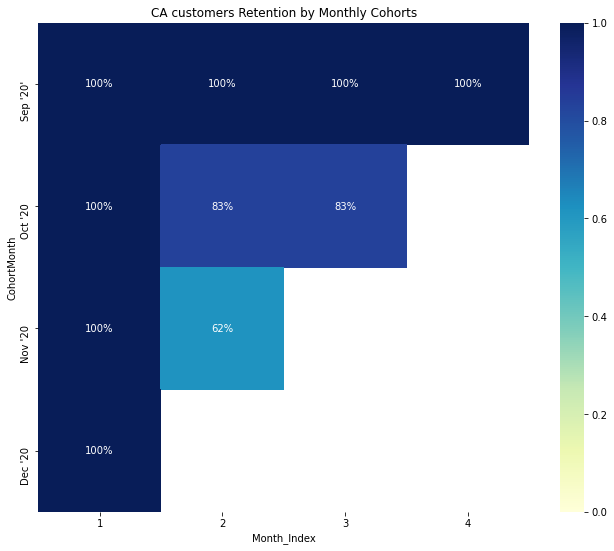

In [82]:
month_list = ["Sep '20'", "Oct '20", "Nov '20", "Dec '20"]
plt.figure(figsize = (11,9))
plt.figure(figsize = (11,9))
plt.title('CA customers Retention by Monthly Cohorts')
sns.heatmap(data = retention_CA, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 1.0,
            cmap = "YlGnBu", yticklabels=month_list)
plt.show()

The October cohort month and 2th month_index column in figure with values 83% represents, 83% of cohorts- Canadian customers which signed in Oct 2020 were active 2 months later. 

Also, 100% value in all cells in column 1 says that this was the month when customer signed up or did their first transaction and have rate of 100% activity.

# average paid

In [83]:
cohort_CAdata2 = CA_data.groupby(['CohortMonth', 'Month_Index'])['paid'].mean().reset_index()
average_CApaid  = cohort_CAdata2.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'paid').round(1)
average_CApaid

Month_Index,1,2,3,4
CohortMonth,,,,
2020-09-01,272.0,272.0,272.0,272.0
2020-10-01,308.1,308.1,315.8,NaN
2020-11-01,286.5,317.1,NaN,NaN
2020-12-01,636.0,NaN,NaN,NaN


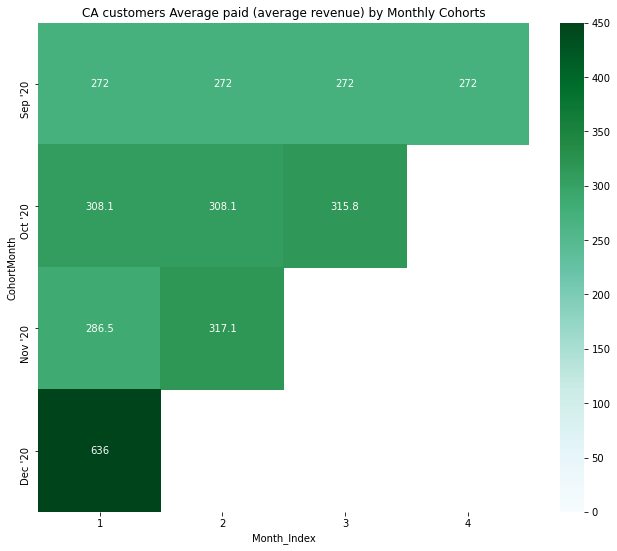

In [84]:
month_list = [  "Sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('CA customers Average paid (average revenue) by Monthly Cohorts')
sns.heatmap(data = average_CApaid, 
            annot = True,
            vmin = 450,
            vmax = 0,
            cmap = "BuGn",
             fmt='g', yticklabels=month_list)
plt.show()

The Sep cohort month and 4th month_index column in figure with values 272 represents, average revenue made from Canadian customers which signed in Aug 2020 and 4 month-index later is 272.

Average revenue made from Canadian customers is highest in Dec 2020 and 1 st cohort month_index - 636

# Average refund

In [85]:
cohort_CAdata3 = CA_data.groupby(['CohortMonth', 'Month_Index'])['refunded'].mean().reset_index()
average_CArefund  = cohort_CAdata3.pivot_table(index = 'CohortMonth',
                                            columns = 'Month_Index',
                                       values = 'refunded').round(1)
average_CArefund

Month_Index,1,2,3,4
CohortMonth,,,,
2020-09-01,272.0,272.0,272.0,272.0
2020-10-01,37.4,37.4,43.7,NaN
2020-11-01,50.7,0.0,NaN,NaN
2020-12-01,371.0,NaN,NaN,NaN


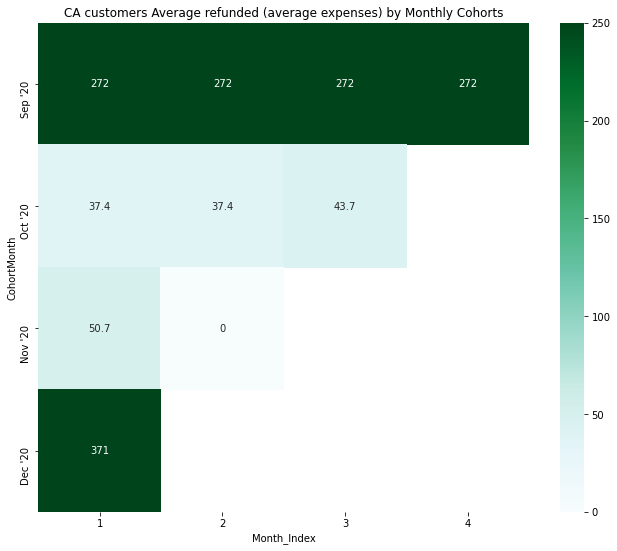

In [86]:
month_list = [ "Sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('CA customers Average refunded (average expenses) by Monthly Cohorts')
sns.heatmap(data = average_CArefund, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From the above heat maps from paid (revenue) and refunded(expenses). It is clear that business is not making much profit from Canadian customers in  Sep 2020. We can see more details on heatmaps for profit.

# Average Profit made from CA Customers

In [87]:
#Create a new column for Total Sales 
CA_data['Totalprofit_CA'] = CA_data['paid'] - CA_data['refunded']

<ipython-input-87-080af5e74cc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['Totalprofit_CA'] = CA_data['paid'] - CA_data['refunded']


In [88]:
CA_data['Totalprofit_CA'].head()

27    262
31    525
41      0
43      0
47      0
Name: Totalprofit_CA, dtype: int64

In [89]:
cohort_CAdata3 = CA_data.groupby(['CohortMonth', 'Month_Index'])['Totalprofit_CA'].mean().reset_index()
average_CAprofit  = cohort_CAdata3.pivot_table(index = 'CohortMonth',
                                           columns = 'Month_Index',
                                      values = 'Totalprofit_CA').round(1)
average_CAprofit

Month_Index,1,2,3,4
CohortMonth,,,,
2020-09-01,0.0,0.0,0.0,0.0
2020-10-01,270.7,270.7,272.2,NaN
2020-11-01,235.8,317.1,NaN,NaN
2020-12-01,264.9,NaN,NaN,NaN


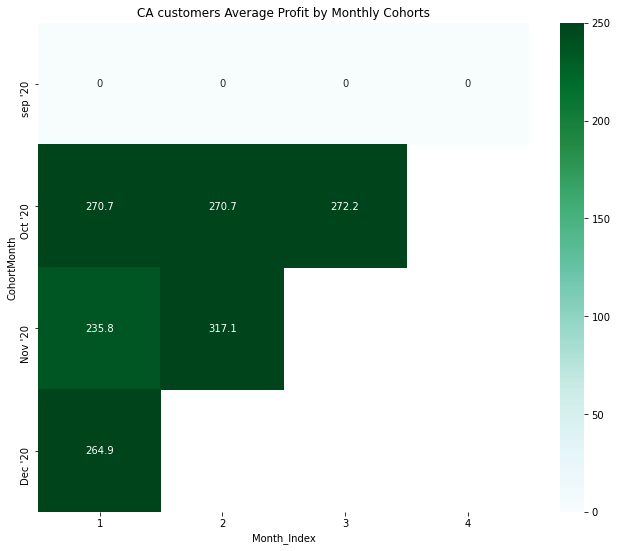

In [90]:
month_list = [ "sep '20", "Oct '20", "Nov '20", "Dec '20"]

plt.figure(figsize = (11,9))
plt.title('CA customers Average Profit by Monthly Cohorts')
sns.heatmap(data = average_CAprofit, 
            annot = True,
            vmin = 250,
            vmax = 0,
            cmap = "BuGn", 
            fmt='g', yticklabels=month_list)
plt.show()

From heatmaps it is clear that business is not making profit from Canadian customers in Sep 2020. From Oct 2020 to Dec 2020 company is making profit. For Nov 2020 and 2nd cohort Month_index company makes highest average profit for Canadian customers of 317.1

# 7. Creating csv for cleaned master data (no geographic separation) to prepare a cohort layer cake

In [91]:
#converting into proper format
df['created'] = pd.to_datetime(df['created'])
df

,created,paid,refunded,customer,card__country
0,2020-10-21 04:45:40+00:00,250,250,cus_IF3JcGrw0aMpgv,US
1,2020-10-27 23:02:31+00:00,250,250,cus_IHaMqtFwUNAO09,US
2,2020-11-01 02:42:43+00:00,250,250,cus_IJ8oU3Lo2gaHls,DE
3,2020-11-17 19:51:25+00:00,750,0,cus_HbD8AagiDUOBoG,US
4,2020-11-17 21:28:58+00:00,250,0,cus_IDnbmEhzNjlGV0,GB
...,...,...,...,...,...
5720,2020-10-11 08:11:05+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5721,2020-08-11 07:08:54+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5722,2020-11-11 08:09:52+00:00,250,250,cus_HoUaOBLxK6Klaa,AU
5723,2020-09-11 08:09:30+00:00,250,250,cus_HoUaOBLxK6Klaa,AU


In [92]:
def monthly(x):
    return datetime.datetime(x.year, x.month, 1)

In [93]:
#Create a new column 
df['InvoiceMonth'] = df['created'].apply(monthly)

In [94]:
#Always inspect the data you've just created
df['InvoiceMonth']

0      2020-10-01
1      2020-10-01
2      2020-11-01
3      2020-11-01
4      2020-11-01
          ...    
5720   2020-10-01
5721   2020-08-01
5722   2020-11-01
5723   2020-09-01
5724   2020-12-01
Name: InvoiceMonth, Length: 5725, dtype: datetime64[ns]

In [95]:
df = df.drop('created',axis=1)

In [96]:
df.head()

,paid,refunded,customer,card__country,InvoiceMonth
0,250,250,cus_IF3JcGrw0aMpgv,US,2020-10-01
1,250,250,cus_IHaMqtFwUNAO09,US,2020-10-01
2,250,250,cus_IJ8oU3Lo2gaHls,DE,2020-11-01
3,750,0,cus_HbD8AagiDUOBoG,US,2020-11-01
4,250,0,cus_IDnbmEhzNjlGV0,GB,2020-11-01


In [98]:
#converting into csv
df.to_csv(r'C:\Users\Keeru\Desktop\master_data.csv', index = False, header = True)
print (df)

      paid  refunded            customer card__country InvoiceMonth
0      250       250  cus_IF3JcGrw0aMpgv            US   2020-10-01
1      250       250  cus_IHaMqtFwUNAO09            US   2020-10-01
2      250       250  cus_IJ8oU3Lo2gaHls            DE   2020-11-01
3      750         0  cus_HbD8AagiDUOBoG            US   2020-11-01
4      250         0  cus_IDnbmEhzNjlGV0            GB   2020-11-01
...    ...       ...                 ...           ...          ...
5720   250       250  cus_HoUaOBLxK6Klaa            AU   2020-10-01
5721   250       250  cus_HoUaOBLxK6Klaa            AU   2020-08-01
5722   250       250  cus_HoUaOBLxK6Klaa            AU   2020-11-01
5723   250       250  cus_HoUaOBLxK6Klaa            AU   2020-09-01
5724   250       250  cus_HoUaOBLxK6Klaa            AU   2020-12-01

[5725 rows x 5 columns]


# 8. Conclusion

The given dataset encountered significant data quality issues.
Columns, such as card__country, have empty values in certain records. Mitigation: If only a small number of rows are empty, filter out the record entirely from the training set for prediction. Else, if it is a core field, impute based on the distribution in the training dataset. Here impute is not possible. Going with 1678 non-null entries.

Making assumption- All the DateTime and currency in a proper format, and there is no need for any conversion. 

From the data analysis, we found the highest-paid countries are KE(Kenya), IN (India). The highest refunded countries are DK (Denmark), IN (India). The top 3 most frequently represented countries on the data frame are the US, AU, CA.

In general, you can see from the retention rate DataFrame:
* Retention Rate 1st index i.e 1st Month is 100% as all the customers for that particular customers signed up in 1st Month
* The retention rate may increase or decrease in Subsequent Indexes.
* Values towards BottomRight have a lot of NaN values.

From heatmaps, it is clear that business is not making a profit from American customers from June 2020 to Sep 2020. From Oct 2020 to Dec 2020 company is making a profit. For Dec 2020 and 1st cohort, Month_index company produces the highest average profit for American customers of 288.2

From heatmaps, it is clear that business is not making a profit from Australian customers in Aug 2020. From Oct 2020 to Dec 2020 company is making a profit. For Nov 2020 and 1st cohort, Month_index company produces the highest average profit for Australian customers of 285.1

From heatmaps, it is clear that business is not making a profit from Canadian customers in Sep 2020. From Oct 2020 to Dec 2020 company is making a profit. For Nov 2020 and 2nd cohort, Month_index company produces the highest average profit for Canadian customers of 317.1

In general, the company is making an average profit from the top 3 most frequently represented countries that are American, Australian and Canadian customers, from Oct 2020 to Dec 2020.

Finally created a CSV for master data (no geographic separation) to prepare a cohort layer cake.